# AI Engineer 2 - Einführung PyTorch
## Aufgabe: Implementieren Sie Ihr erstes Neuronales Netz
Wählen Sie einen beliebigen einfachen Datensatz (bspw. Iris-binary, Vorbereitungszeit auf Klausur o.ä.) und trainieren Sie ein mehrschichtiges Neuronales Netz mit PyTorch. Zeigen Sie grafisch auf, dass Ihr Modell konvergiert.

### Import Libraries

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib import cm
from sklearn import metrics

import torch
import torch.nn as nn
import torch.nn.functional as F

### Load data

In [2]:
data = load_iris()

### Split data into x and y and test and train sets

In [ ]:
# Select only 2 dimensions.
x = data["data"][:, :2]
# Binarize target.
y = np.where(data["target"] >= 1, 1, 0)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=45)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

### Define Neural Network architecrute using Pytorch library

In [4]:
class Net(nn.Module):


    def __init__(self):
        """
        Initialization of the neural network architecture
        with a specified amount of layers and neurons.
        Tipp: Sometimes it helps to use batch normalization layers
        to standardize inputs for the next layer and thus
        making training more stable and faster.
        """
        super().__init__()
        self.fc1 = nn.Linear(2, 8)
        #self.b1 = nn.BatchNorm1d(8)
        self.fc2 = nn.Linear(8, 4)
        #self.b2 = nn.BatchNorm1d(4)
        self.fc4 = nn.Linear(4, 1)


    def forward(self, x):
        """
        Feeding input x through the layers and activation functions (relu, sigmoid).
        Returning output y after propagating through the whole architecture.
        """
        y = F.relu(self.fc1(x))
        y = F.relu(self.fc2(y))
        y = F.sigmoid(self.fc4(y))
        return y


### Training a Neural Network

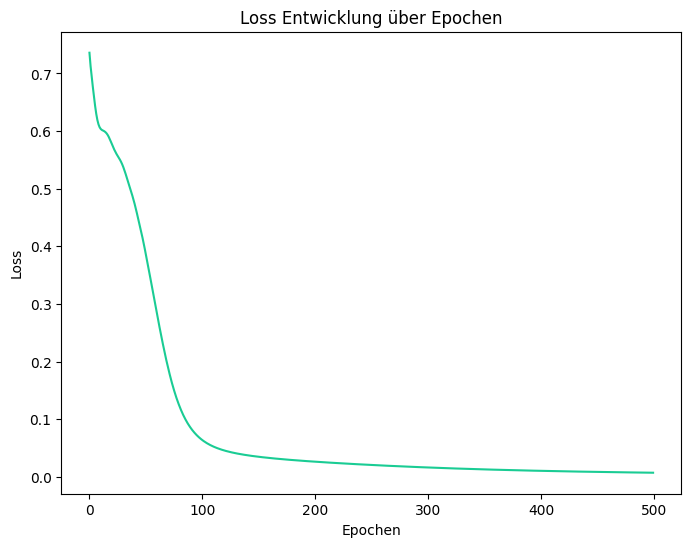

In [5]:
# Initialize NN model.
model = Net()

# Initialize loss function and optimizer with model parameters and learning rate.
loss = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.009)

# Initialize error list for later visualization.
epoch_errors = []

# Train the model in n epochs.
for epoch in range(500):
    # Set all gradients to zero since it is a new iteration and optimization round.
    optimizer.zero_grad()
    # Compute error on training data.
    # Do some transformations on the data to get it in the right tensor shape for the model.
    error = loss(model(torch.from_numpy(x_train).type(
        torch.FloatTensor)), torch.from_numpy(y_train).unsqueeze(1).type(torch.FloatTensor))
    # Store error for later visualization.
    epoch_errors.append(error.item())
    # Compute gradients for all the parameters.
    error.backward()
    # Update all parameters using the gradients and optimizer formula.
    optimizer.step()

# Plot error evolution over the epochs.
plt.figure(figsize=(8, 6))
plt.plot(epoch_errors, color="#1ACC94")
plt.title('Loss Entwicklung über Epochen')
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.show()


In [6]:
def evaluation_measures(y_test, y_pred):
    """
    Evaluate model predictions y_pred to the true labels y_test.

    Parameters
    ----------
    y_test : list or ndarray or pd.series.
        The data to process.
    y_pred : list or np.array or pd.series.
        The respective column's name.

    Returns
    -------
    cr : dict.
        classification report for the input.
    fpr, tpr, roc_auc : tuple(int, int, int).
        False-positive-rate, true-positive-rate and area-under-curve for input.
        Needed to plot ROC curve.
    cm : ndarray.
        Confusion matrix for input.
    """
    # Classification report.
    cr = metrics.classification_report(y_test, y_pred)

    # ROC curve.
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    # Confusion matrix.
    cm = metrics.confusion_matrix(y_test, y_pred)

    return cr, (fpr, tpr, roc_auc), cm


def plot_roc(auc_tuple):
    """
    Plots the ROC curve for input data.

    Parameters
    ----------
    auc_tuple : tuple(int, int, int).
        Includes fpr, tpr and auc (area-under-curve).
    """
    fpr, tpr, roc_auc = auc_tuple
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()


def plot_cm(cm):
    """
    Plots the confusion matrix for input data.

    Parameters
    ----------
    cm : ndarray.
        Includes TN, FP, FN and TP.
    """
    tn, fp, fn, tp = cm.ravel()
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Reds")
    plt.show()

In [12]:
# predict a single value
foo = np.array([4.9, 3.0])
y_pred = model(torch.from_numpy(foo).type(
    torch.FloatTensor)).detach().numpy()

print(y_pred)


[0.00354172]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



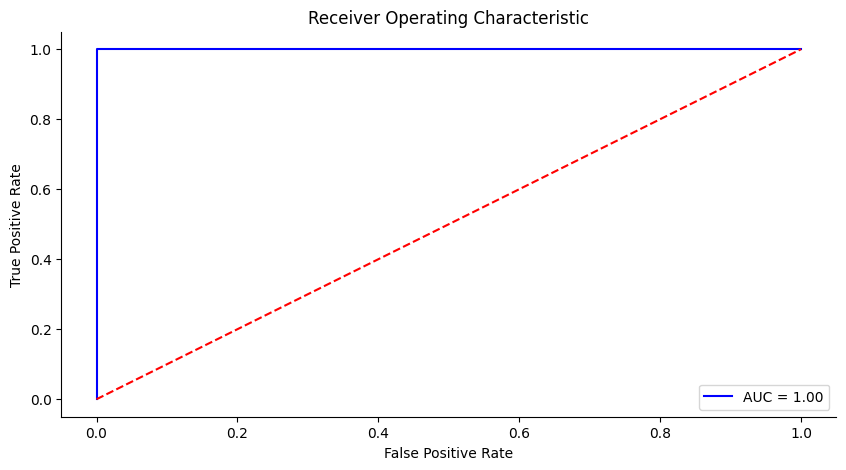

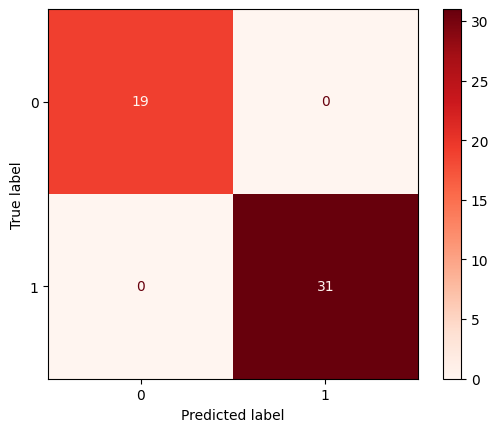

In [7]:
# Predict the testing set and copy true classes.
y_pred = model(torch.from_numpy(x_test).type(
    torch.FloatTensor)).detach().numpy()
y_pred = y_pred.reshape(y_pred.size)
y_true = np.copy(y_test)

# Binarize output since it is a classification task.
y_pred_binary = y_pred.round().astype(int)

# Evaluate model using preditions.
cr, roc, cm = evaluation_measures(y_test, y_pred_binary)
print(cr)
plot_roc(roc)
plot_cm(cm)